In [62]:
import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Analysis of Washington (year changed 2012) with the controls Idaho, Oregon, and Montana

In [2]:
complete_frame = pd.read_csv('ultimate_final_frame.csv')

In [3]:
complete_frame.head()

,Unnamed: 0,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC
0,0,2006.0,13001.0,APPLING,3996.843779,GA,NaN,NaN,17725.0,NaN
1,1,2006.0,13003.0,ATKINSON,1375.483686,GA,NaN,NaN,8197.0,NaN
2,2,2006.0,13005.0,BACON,4586.778211,GA,NaN,NaN,10682.0,NaN
3,3,2006.0,13007.0,BAKER,9.651600,GA,NaN,NaN,3877.0,NaN
4,4,2006.0,13009.0,BALDWIN,11069.705010,GA,NaN,NaN,46513.0,NaN


In [4]:
#Separate out the states of interest

In [5]:
northwest_frame = complete_frame.loc[(complete_frame['State'] == 'WA') | (complete_frame['State'] == 'ID') | (complete_frame['State'] == 'MO') | (complete_frame['State'] == 'OR')]


In [6]:
#Confirm worked
northwest_frame.sample(10)

,Unnamed: 0,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC
4524,9811,2009.0,16047.0,GOODING,NaN,ID,NaN,NaN,14320.0,NaN
6183,11470,2009.0,41053.0,POLK,NaN,OR,NaN,NaN,74550.0,NaN
4417,9704,2006.0,16083.0,TWIN FALLS,NaN,ID,NaN,NaN,71974.0,NaN
5206,10493,2006.0,29007.0,AUDRAIN,NaN,MO,NaN,NaN,25869.0,NaN
6235,11522,2011.0,41041.0,LINCOLN,NaN,OR,NaN,NaN,45933.0,NaN
7860,13147,2008.0,53013.0,COLUMBIA,NaN,WA,NaN,NaN,3903.0,NaN
5215,10502,2006.0,29027.0,CALLAWAY,NaN,MO,NaN,NaN,43118.0,NaN
5685,10972,2010.0,29169.0,PULASKI,NaN,MO,NaN,NaN,49114.0,NaN
3289,7452,2013.0,NaN,SNOHOMISH,NaN,WA,126.0,NaN,NaN,NaN
5696,10983,2010.0,29199.0,SCOTLAND,NaN,MO,NaN,NaN,4831.0,NaN


In [7]:
#Groupby to obtain deaths per year
northwest_grouped = northwest_frame.groupby(['Year', 'FIPS', 'County', 'State','Deaths_PC'], as_index = False)
northwest_summed = northwest_grouped.sum()

In [8]:
#confirm grouped correctly
northwest_summed.sample(10)
#lookes correct

,Year,FIPS,County,State,Deaths_PC,Unnamed: 0,Morphine_equ,Deaths,Year_Changed,Population
218,2011.0,41043.0,LINN,OR,0.000147,5977,0.0,17.0,0.0,115776.0
119,2009.0,29091.0,HOWELL,MO,0.000285,4654,0.0,11.0,0.0,38561.0
235,2011.0,53067.0,THURSTON,WA,0.000109,6139,0.0,27.0,0.0,248327.0
196,2011.0,16019.0,BONNEVILLE,ID,0.000117,5651,0.0,12.0,0.0,102422.0
95,2008.0,53025.0,GRANT,WA,0.000129,4373,0.0,11.0,0.0,84944.0
118,2009.0,29077.0,GREENE,MO,0.000202,4653,0.0,53.0,0.0,262887.0
79,2008.0,29183.0,SAINT CHARLES,MO,0.000071,4103,0.0,25.0,0.0,351179.0
123,2009.0,29167.0,POLK,MO,0.000367,4658,0.0,11.0,0.0,29983.0
89,2008.0,41051.0,MULTNOMAH,OR,0.000219,4248,0.0,156.0,0.0,712989.0
109,2009.0,16005.0,BANNOCK,ID,0.000137,4509,0.0,11.0,0.0,80428.0


C:\Users\apatt\AppData\Roaming\Python\Python37\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 24'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


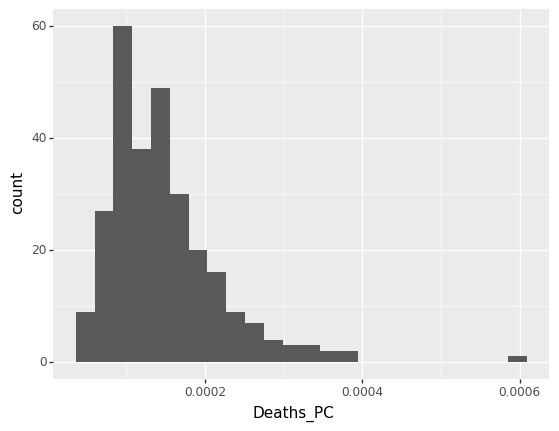

<ggplot: (-9223371879668996159)>

In [9]:
(ggplot(northwest_summed,aes('Deaths_PC')) + geom_histogram()
)
#very interesting, there is at least one outlier county

In [10]:
#investigation of the outlier county
max_DPC = northwest_summed.loc[northwest_summed['Deaths_PC'] == northwest_summed['Deaths_PC'].max()]
max_DPC.head()
#Pemiscot County in Montana is the outlier

,Year,FIPS,County,State,Deaths_PC,Unnamed: 0,Morphine_equ,Deaths,Year_Changed,Population
164,2010.0,29155.0,PEMISCOT,MO,0.000592,5208,0.0,11.0,0.0,18587.0


In [11]:
#Otherwise, the graph appears to be slightly right skewed

In [12]:
#Separate out Idaho, Montana, Washington, and Oregon. Also have a df without washington only (just the controls)

In [15]:
wash_only = northwest_summed.loc[northwest_summed['State'] == 'WA']
oregon_only = northwest_summed.loc[northwest_summed['State'] == 'OR']
idaho_only = northwest_summed.loc[northwest_summed['State'] == 'ID']
mont_only = northwest_summed.loc[northwest_summed['State'] == 'MO']
control_only = northwest_summed.loc[northwest_summed['State'] != 'WA']

In [17]:
wash_only.tail()

,Year,FIPS,County,State,Deaths_PC,Unnamed: 0,Morphine_equ,Deaths,Year_Changed,Population
275,2012.0,53061.0,SNOHOMISH,WA,0.000183,6752,0.0,131.0,0.0,714443.0
276,2012.0,53063.0,SPOKANE,WA,0.000179,6753,0.0,84.0,0.0,470375.0
277,2012.0,53067.0,THURSTON,WA,0.000099,6754,0.0,25.0,0.0,252410.0
278,2012.0,53073.0,WHATCOM,WA,0.000065,6755,0.0,13.0,0.0,201404.0
279,2012.0,53077.0,YAKIMA,WA,0.000103,6756,0.0,25.0,0.0,242454.0


In [18]:
#Create a policy change column for Washington which indicates how far the row was from the policy change

In [50]:
wash_only['Year'] = wash_only["Year"].astype(int)
wash_only.loc[:,'Years From Policy Change'] = wash_only.loc[:,'Year'] - 2012

C:\Users\apatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
wash_only.tail()

,Year,FIPS,County,State,Deaths_PC,Unnamed: 0,Morphine_equ,Deaths,Year_Changed,Population,Policy_change,Years From Policy Change
275,2012,53061.0,SNOHOMISH,WA,0.000183,6752,0.0,131.0,0.0,714443.0,1,0
276,2012,53063.0,SPOKANE,WA,0.000179,6753,0.0,84.0,0.0,470375.0,1,0
277,2012,53067.0,THURSTON,WA,0.000099,6754,0.0,25.0,0.0,252410.0,1,0
278,2012,53073.0,WHATCOM,WA,0.000065,6755,0.0,13.0,0.0,201404.0,1,0
279,2012,53077.0,YAKIMA,WA,0.000103,6756,0.0,25.0,0.0,242454.0,1,0


In [ ]:
#groupby year for washington only, and then recalculate for per capita

In [57]:
wash_only_g = wash_only.groupby('Year').mean()
wash_only_g.reset_index(inplace = True)
wash_only_g['Deaths_PC'] = wash_only_g['Deaths'] / wash_only_g['Population']

In [58]:
wash_only_g.tail()

,Year,FIPS,Deaths_PC,Unnamed: 0,Morphine_equ,Deaths,Year_Changed,Population,Policy_change,Years From Policy Change
2,2008,53042.176471,0.000143,4377.0,0.0,49.588235,0.0,346230.411765,0.0,-4
3,2009,53040.750000,0.000140,4925.5,0.0,50.312500,0.0,359833.562500,0.0,-3
4,2010,53040.466667,0.000128,5506.0,0.0,49.066667,0.0,383695.733333,0.0,-2
5,2011,53041.666667,0.000148,6134.0,0.0,57.666667,0.0,389151.000000,0.0,-1
6,2012,53041.250000,0.000139,6748.5,0.0,52.062500,0.0,373522.437500,1.0,0


In [26]:
#Making the pre-post model

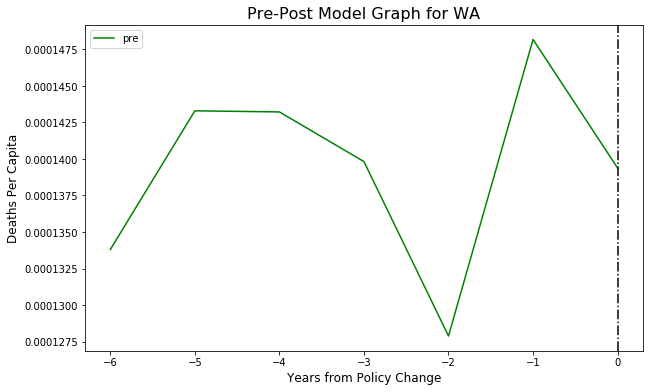

In [85]:
plt.figure(figsize=(10,6))
sns.lineplot(wash_only_g[wash_only_g['Year']<=2012]['Years From Policy Change'],wash_only_g['Deaths_PC'],color="green",label = 'pre')
sns.lineplot(wash_only_g[wash_only_g['Year']>2012]['Years From Policy Change'],wash_only_g['Deaths_PC'],color="blue",label = 'post')
plt.axvline(x=0,linestyle = '-.',color = 'black')
plt.xlabel("Years from Policy Change",fontsize = 12)
plt.ylabel("Deaths Per Capita",fontsize = 12)
plt.title("Pre-Post Model Graph for WA",fontsize = 16)
plt.show()

In [81]:
#difference in difference

C:\Users\apatt\AppData\Roaming\Python\Python37\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


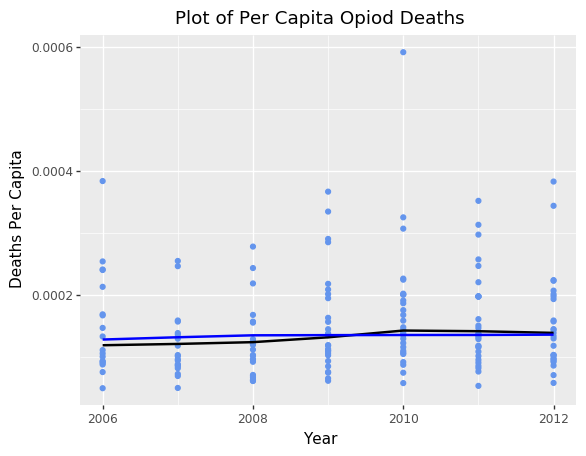

<ggplot: (157186401130)>

In [83]:
(ggplot(control_only_summed, aes(x='Year', y= 'Deaths_PC')) +
        geom_point(color = 'cornflowerblue') + geom_smooth(method = 'lowess') + ylab('Deaths Per Capita') + ggtitle('Plot of Per Capita Opiod Deaths') +
        geom_smooth(data=wash_only, method='lowess', color ='blue', se=False)
)

In [68]:
#create a dataframe with the controls summed together by year
control_only_summed = control_only.drop(columns = ['State', 'County'])
control_only_summed.groupby('Year').mean()
control_only_summed.loc[:,'Years From Policy Change'] = control_only_summed.loc[:,'Year'] - 2012
control_only_summed['Deaths_PC'] = control_only_summed['Deaths'] / control_only_summed['Population']

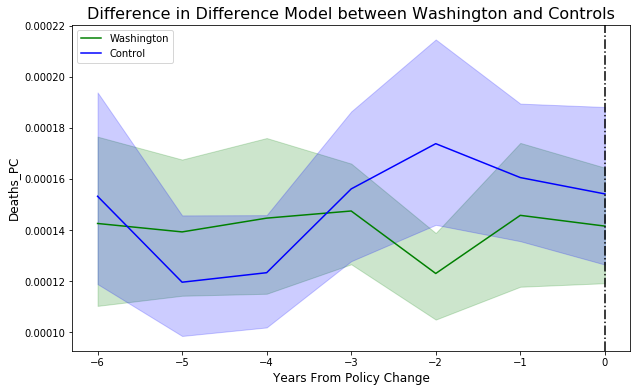

In [75]:
plt.figure(figsize=(10,6))
sns.lineplot(wash_only[wash_only['Year']<=2012]['Years From Policy Change'],wash_only['Deaths_PC'],color="green",label = 'Washington')
sns.lineplot(wash_only[wash_only['Year']>2012]['Years From Policy Change'],wash_only['Deaths_PC'],color="green")
sns.lineplot(control_only_summed[control_only_summed['Year']<=2012]['Years From Policy Change'],control_only_summed['Deaths_PC'],color="blue",label = 'Control')
sns.lineplot(control_only_summed[control_only_summed['Year']>2012]['Years From Policy Change'],control_only_summed['Deaths_PC'],color="blue")
plt.axvline(x=0,linestyle = '-.',color = 'black')
plt.xlabel("Years From Policy Change",fontsize = 12)
plt.ylabel("Deaths_PC",fontsize = 12)
plt.title("Difference in Difference Model between Washington and Controls",fontsize = 16)
plt.show()

In [77]:
#Regressions
pre_post_model = smf.ols('Deaths_PC ~ C(Year) + C(County) + C(Policy_change) + Population', data = wash_only).fit()
print(pre_post_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Deaths_PC   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     11.06
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           2.24e-17
Time:                        17:13:48   Log-Likelihood:                 999.30
No. Observations:                 109   AIC:                            -1945.
Df Residuals:                      82   BIC:                            -1872.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [80]:
#Regression with interaction terms
pre_post_model2 = smf.ols('Deaths_PC ~ C(Year) + C(County) + C(Policy_change) + C(Year):C(Policy_change)', data = wash_only).fit()
print(pre_post_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              Deaths_PC   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     11.62
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           6.72e-18
Time:                        17:14:52   Log-Likelihood:                 999.25
No. Observations:                 109   AIC:                            -1946.
Df Residuals:                      83   BIC:                            -1877.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

C:\Users\apatt\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\apatt\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\apatt\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\apatt\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [ ]:
#Since the interaction term has a very large p-value, the results are not significant